In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Team Casimir Food Price Versus Protein Notebook
This is a supplementary notebook that visualizes the relationship between price and the protein richness of different food products.

In [ ]:
data = pd.read_csv('./data/price_master.csv')
data.head()

In [84]:
# Define the food categories as provided
food_categories = {
    'Meats': ['Chicken', 'Beef', 'Pork', 'Turkey', 'Salmon', 'Tuna'],
    'Dairy': ['Milk', 'Cheese', 'Yogurt'],
    'Eggs': ['Eggs'],
    'Legumes and Nuts': ['Beans', 'Lentils', 'Peanuts', 'Almonds', 'Nuts'],
    'Vegetables': ['Tomato', 'Lettuce', 'Carrot', 'Broccoli', 'Spinach', 'Peppers', 'Onions', 'Vegetables'],
    'Fruits': ['Apple', 'Banana', 'Orange', 'Berries', 'Fruits'],
    'Grains': ['Bread', 'Rice', 'Pasta', 'Wheat', 'Oats', 'Grains']
}

In [17]:
# Reverse mapping for easier category lookup
item_to_category = {}
for category, items in food_categories.items():
    for item in items:
        item_to_category[item.lower()] = category

# Add a new column for the food category
data['Category'] = data['Food item'].apply(lambda x: item_to_category.get(x.lower(), 'Other'))

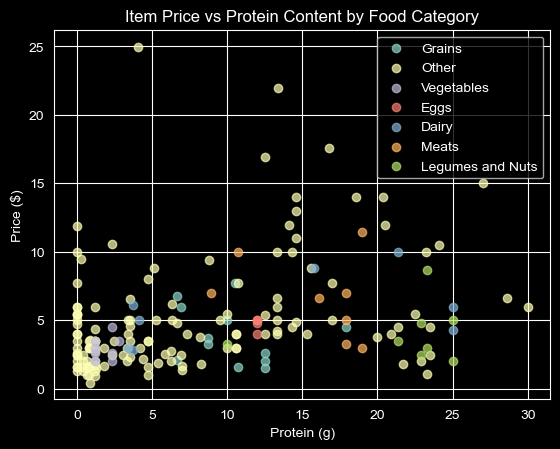

In [19]:
# Plotting
fig, ax = plt.subplots()
categories = data['Category'].unique()
for category in categories:
    subset = data[data['Category'] == category]
    ax.scatter(subset['Protein'], subset['Price'], label=category, alpha=0.7)

ax.set_xlabel('Protein (g)')
ax.set_ylabel('Price ($)')
ax.set_title('Item Price vs Protein Content by Food Category')
ax.legend()
plt.show()

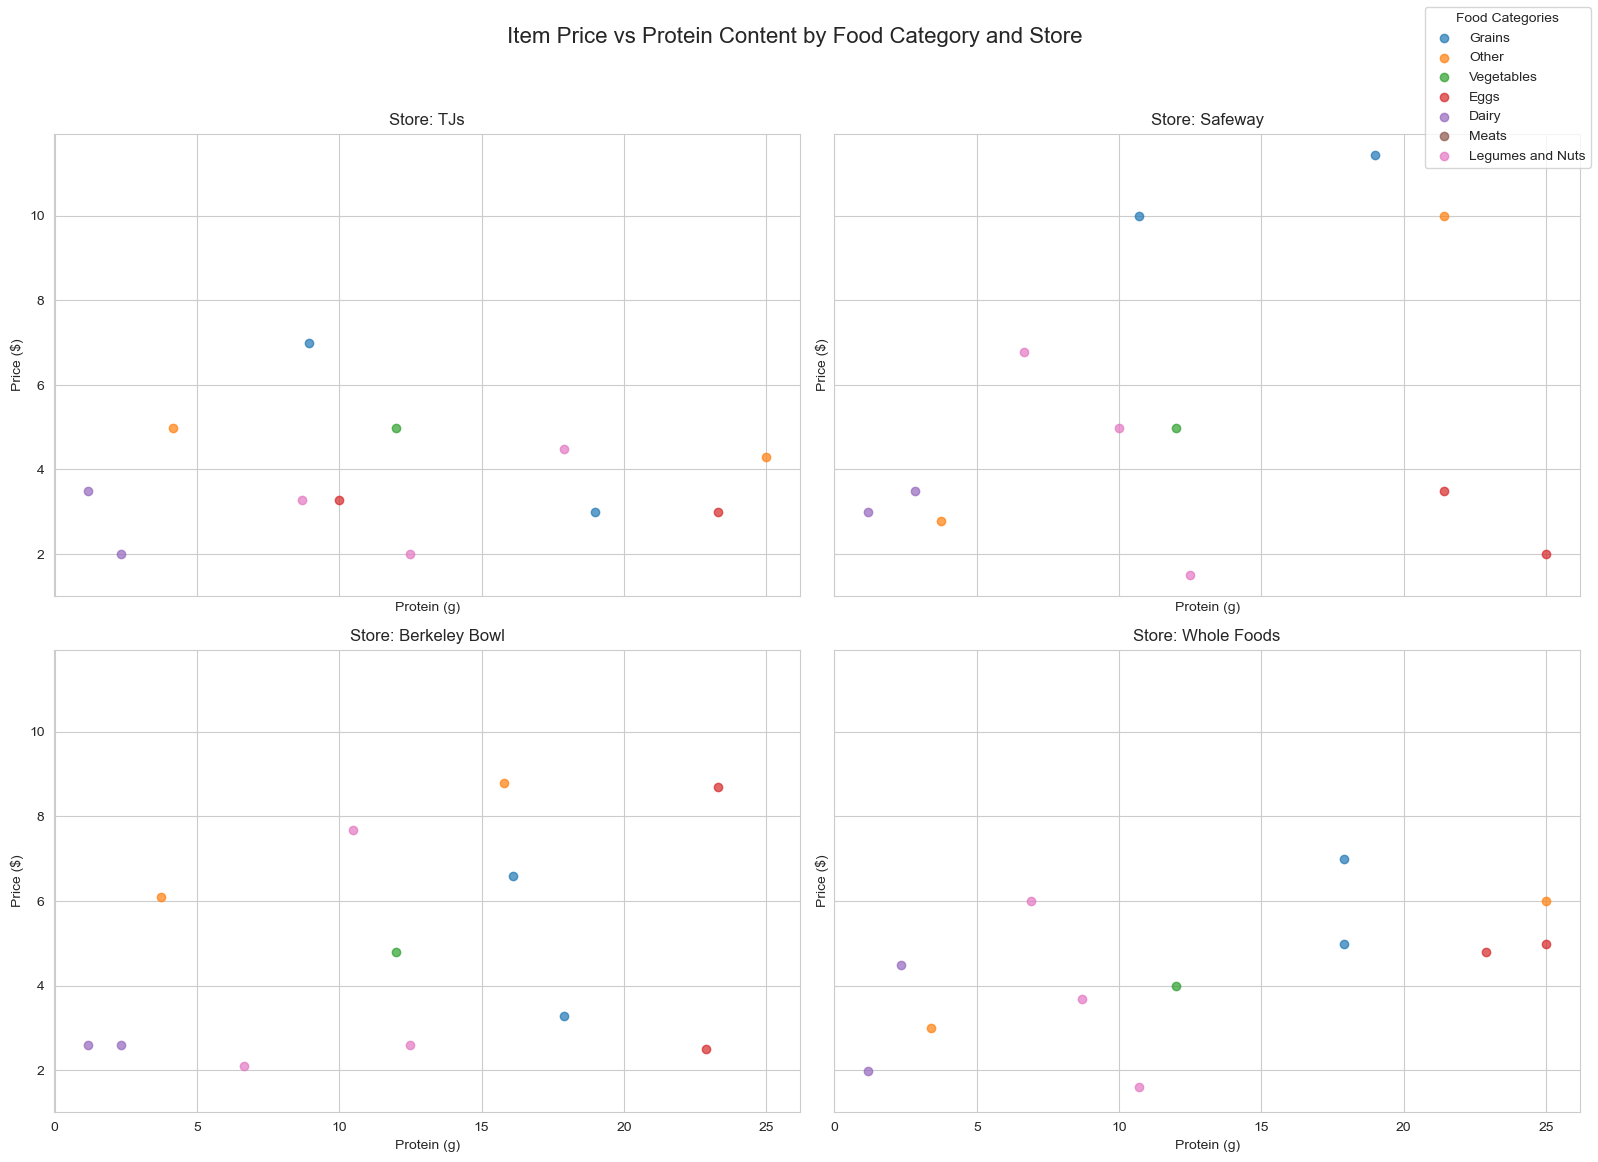

In [21]:
import seaborn as sns

# Set the style of seaborn for more aesthetic plots
sns.set_style("whitegrid")

# Creating a 2x2 subplot for each store
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Item Price vs Protein Content by Food Category and Store', fontsize=16)

stores = data['Store'].unique()
colors = sns.color_palette("tab10", len(food_categories))

# Loop through each subplot to plot each store's data
for ax, store in zip(axs.flatten(), stores):
    store_data = data[data['Store'] == store]
    for (category, color) in zip(food_categories.keys(), colors):
        subset = store_data[store_data['Category'] == category]
        ax.scatter(subset['Protein'], subset['Price'], label=category, alpha=0.7, color=color)
    ax.set_title(f'Store: {store}')
    ax.set_xlabel('Protein (g)')
    ax.set_ylabel('Price ($)')

# Adjust layout to not overlap and add a legend outside of the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.legend(categories, loc='upper right', title="Food Categories")
plt.show()

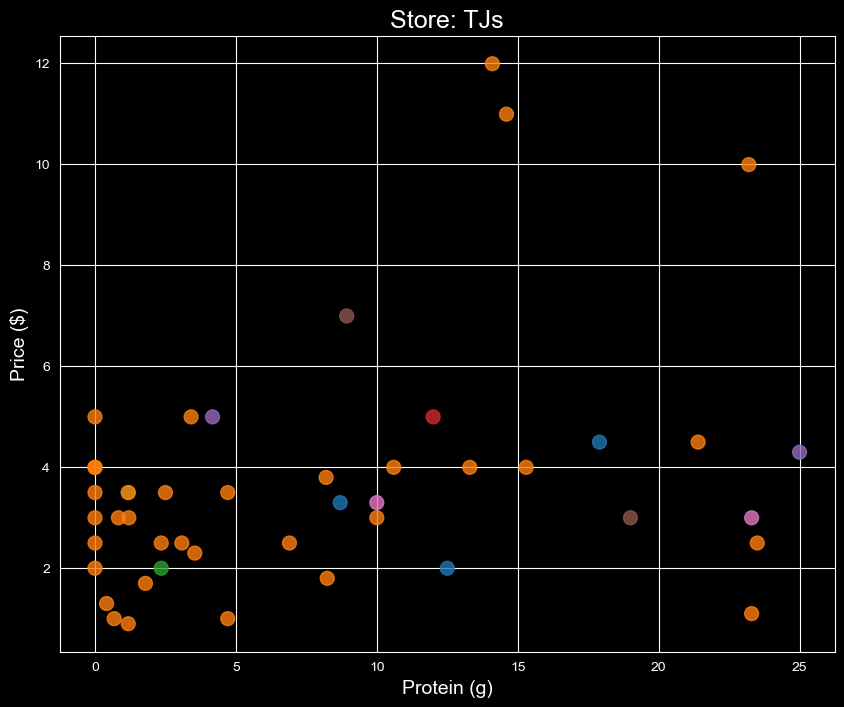

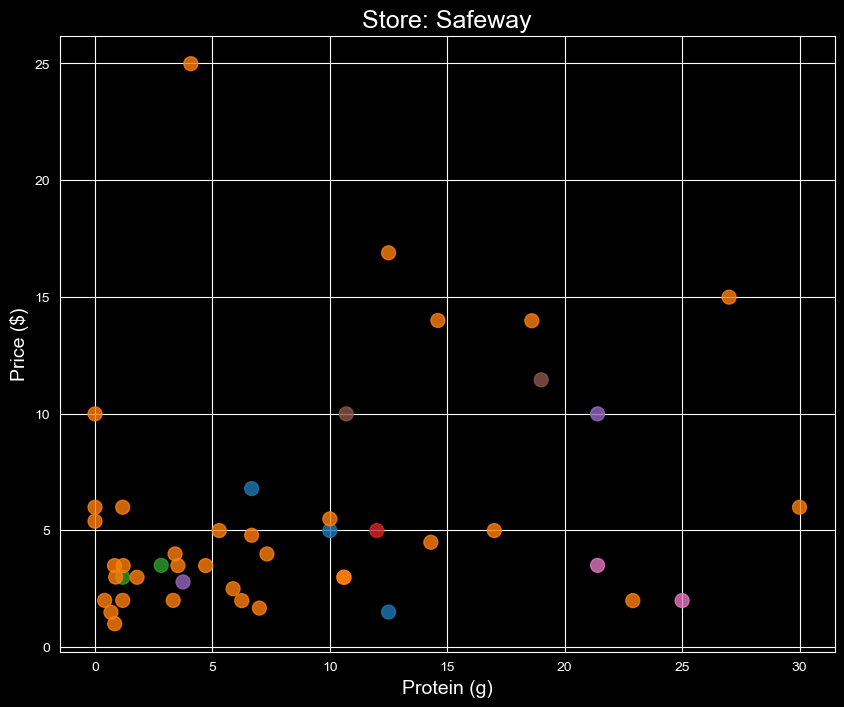

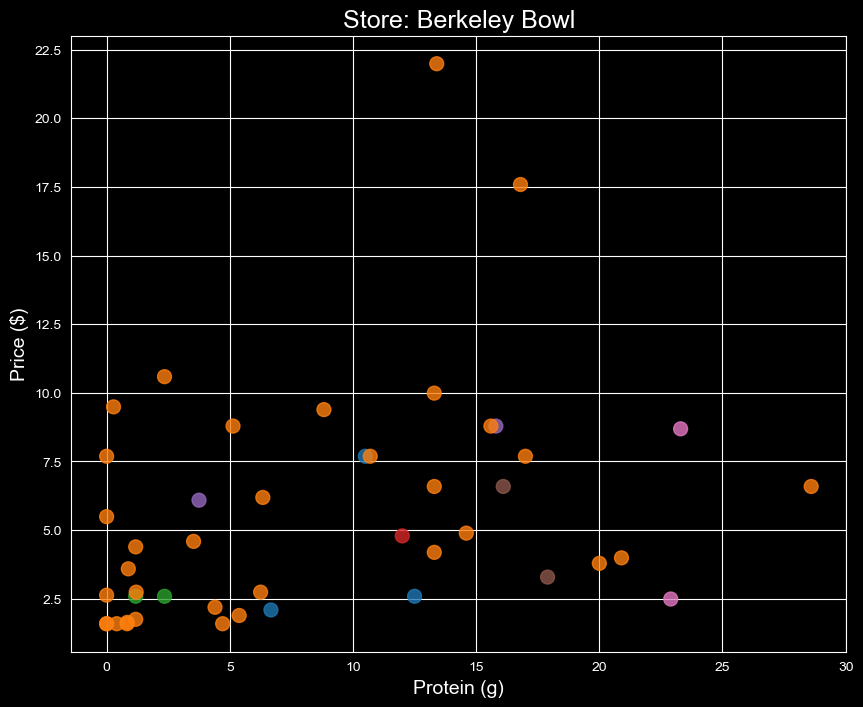

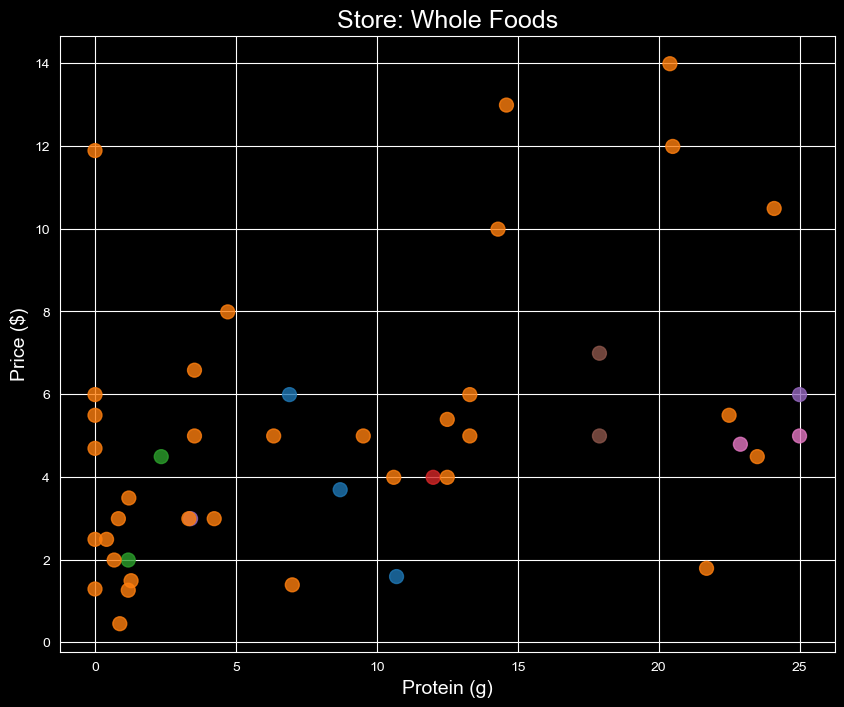

In [74]:
# Creating individual plots for each store with a dark background
plt.style.use('dark_background')

# Separate figure for each store
for store in stores:
    fig, ax = plt.subplots(figsize=(10, 8))
    store_data = data[data['Store'] == store]
    category_colors = dict(zip(store_data['Category'].unique(), colors))
    
    # Scatter plot without labels for each point
    scatter = ax.scatter(store_data['Protein'], store_data['Price'], 
                         c=store_data['Category'].map(category_colors), 
                         alpha=0.8, s=100)

    ax.set_title(f'Store: {store}', color='white', fontsize=18)
    ax.set_xlabel('Protein (g)', color='white', fontsize=14)
    ax.set_ylabel('Price ($)', color='white', fontsize=14)
    ax.tick_params(colors='white')

    # Display the plot
    plt.show()